<a href="https://colab.research.google.com/github/kevinNdyabandiho/Labactivity1/blob/main/A_LabActivites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Admission numbers: 123700, 122787, 100036, 116847, 123072** 

**Lab Activity 1**

**1. FLEX ( Fast LEXical analyzer generator )**  
This is a computer program that is used to generate scanners. In stead of writing a scanner from scratch, you only need to identify the vocabulary of a certain language (e.g. Hello), write a specification of patterns using regular expressions, and FLEX will construct a scanner for you.

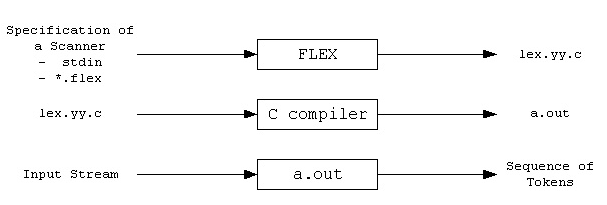

***Example 1: Count the number of characters in a string***

In [ ]:
/* Declaring two counters one for number
of lines other for number of characters */

%{
int no_of_lines = 0;
int no_of_chars = 0;
%}


/***rule 1 counts the number of lines,
rule 2 counts the number of characters
and rule 3 specifies when to stop
taking input***/


%%
\n	++no_of_lines;
.	  ++no_of_chars;
    end	 return 0;
%%



/*** User code section***/

int yywrap(){}
int main(int argc, char **argv)
{

yylex();
printf("number of lines = %d, number of chars = %d\n",
	no_of_lines, no_of_chars );

return 0;
}


SyntaxError: ignored

**2. Bison**

Bison is a general purpose parser generator that converts a grammar description for an LALR(1) context-free grammar into a C program to parse that grammar. The It's a bottom-up parser and it works, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start-symbol.

The diagram below shows how bison works. It converts a grammar description for an LALR cont free grammar into a C program to parse that grammar. The bison Parser is a bottom up parser that tries by shifts and reductions to reduce the entire input down to a single grouping whose symbol is the grammars start symbol.

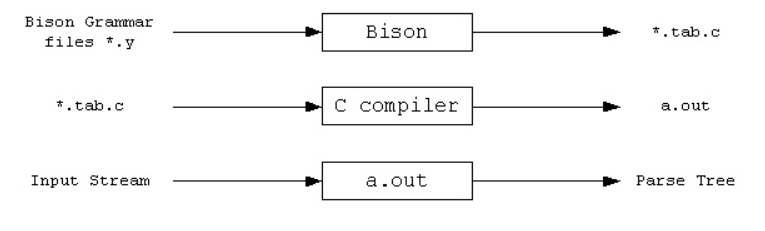





Simple Calculator Using Bison

In [ ]:
%{  
    #include <stdio.h>
    #include <assert.h>
    
    static int Pop();
    static int Top();
    static void Push(int val);
%}

%token T_Int

%%
S    :    S E '\n' { printf("= %d\n", Top()); }
     |    
     ;
     
E    :  E E '+' { Push(Pop() + Pop()); }
     |  E E '-' { int op2 = Pop(); Push(Pop() - op2); }
     |  E E '*' { Push(Pop() * Pop()); }
     |  E E '/' { int op2 = Pop(); Push(Pop() / op2); }
     |  T_Int   { Push(yylval); }    
     ;
%%

static int stack[100], count = 0;

static int Pop(){
    assert(count > 0);
    return stack[--count];
}
static int Top(){
    assert(count > 0);
    return stack[count-1];
}
static void Push(int val){
    assert(count < sizeof(stack)/sizeof(*stack));
    stack[count++] = val;
}

int main(){
    return yyparse();
}

Creating Scanner For parser 

In [ ]:
%{  
    #include "y.tab.h"
%}
%%
[0-9]+    { 
              yylval = atoi(yytext); 
              return T_Int;
          }
[-+*/\n]  { 
              return yytext[0];
          }
.         { // ignore the rest }

**3. LEX**

Lex is a computer program that generates lexical analyzers.It is designed for lexical processing for character input stream. It is used with YACC parser generator. It accepts a high-level, problem oriented specification for character string matching and produces a program in a general purpose language which recognizes regular expressions.
It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.


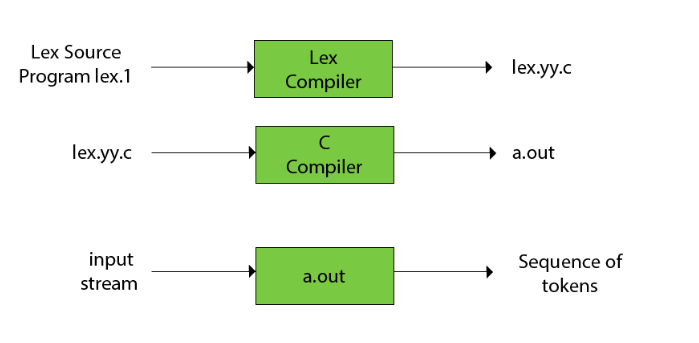

In [ ]:
%%
          int k;
[0-9]+   {
          k = atoi(yytext);
          if (k%7 == 0)
              printf("%d", k+3);
          else
              printf("%d",k);
          }

UsageError: Cell magic `%%` not found.


**4. Yacc -Yet Another Compiler Compiler**

YACC is an LALR(1) (LookAhead, Left-to-right, Rightmost derivation producer with 1 lookahead token) parser generator. It was originally designed for being complemented by lex. It uses grammar rules that allows it to analyze tokens and create a syntax tree. Yacc provides a general tool for describing the input to a computer program. The user specifies the structures of his input together with code to be invoked as each such structure is recognized. Yacc is written in portable C.

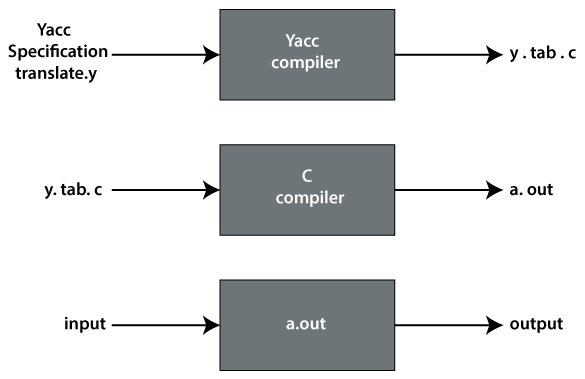

**YACC Program for Binary to Decimal Conversion**

Lexical Analyzer 

In [ ]:
%{
  /* Definition section */
  include<stdio.h>
  include<stdlib.h>
  include"y.tab.h"
  extern int yylval;
%}
  
 %%
 0 {yylval=0;return ZERO;}
 1 {yylval=1;return ONE;}
   
 [ \t] {;}
 \n return 0;
 . return yytext[0];
%%
  
    
int yywrap()  
 {  
  return 1;  
 }  

Parser Source Code

In [ ]:
%{

  void yyerror(char *s);
  
%}
%token ZERO ONE
  
/* Rule Section */
%%
N: L {printf("\n%d", $$);}
L: L B {$$=$1*2+$2;}
| B {$$=$1;}
B:ZERO {$$=$1;}
|ONE {$$=$1;};
%%
  
//driver code 
int main()
{
 while(yyparse());
 }
  
yyerror(char *s)
{
 fprintf(stdout, "\n%s", s);
}

**Lab Activity 2**

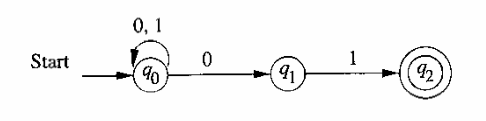

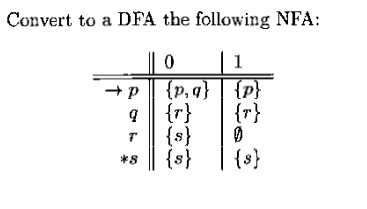

Using the material on E-Learning, show how to use Flex and Bison when building a simple lexical analyzer.


***Flex***


Regular expressions are used to specify the patterns in the scanner, while C code is used to specify the actions. The .l extension is used to identify specification files. You command flex on a.l file and produces the source file lex.yy.c, which is made up of a large amount of unfamiliar C code that implements an FA and includes the action code as well as all of your rules you mentioned. One token will be scanned by the file's extern function yylex().You build a program scanner by compiling that C code normally and linking it with the Lex library. By default, the scanner reads from stdin and writes to stdout.
Linking with the lex library provides a simple main that will repeatedly call yylex until it reaches EOF. To customize when tokens are scanned, you can alternatively compile and link the scanner into your project and use your own main.


***Bison***


The actual language-design process using Bison, from grammar specification to a working compiler or interpreter, has these parts:
Formally specify the grammar in a form recognized by Bison. For each grammatical rule in the language, describe the action that is to be taken when an instance of that rule is recognized. The action is described by a sequence of C statements.
Write a lexical analyzer to process input and pass tokens to the parser. The lexical analyzer may be written by hand in C. It could also be produced using Lex.
Write a controlling function that calls the Bison-produced parser.
Write error-reporting routines.
To turn this source code as written into a runnable program, you follow the steps:
Run Bison on the grammar to produce the parser.
Compile the code output by Bison, as well as any other source files.
Link the object files to produce the finished product.

**References**

https://www.cs.cmu.edu/~wmh/bison.html